# Logistic Regression Exercise: Predicting Diabetes

In this exercise, you will use logistic regression to predict whether a patient has diabetes based on certain diagnostic measurements. You will be working with the Pima Indians Diabetes Database.

## Dataset Description
The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Your Task
1. Load and explore the dataset
2. Preprocess the data
3. Split the data into training and testing sets
4. Create and train a logistic regression model
5. Make predictions on the test set
6. Evaluate the model's performance
7. Interpret the results

Follow the steps below and fill in the code where indicated.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)

# Display the first few rows and basic information about the dataset
print(df.head())
#print(df.info())
print(df.isnull().sum())
df=df.dropna()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Data Preprocessing
1. Check for missing values
2. Handle any missing or zero values in the dataset
3. Separate features (X) and target variable (y)
4. Split the data into training and testing sets
5. Scale the features

In [2]:
# Your code here
# 1. Check for missing values
print(df.isnull().sum())
df=df.dropna()

# 2. Handle missing or zero values
df=df.dropna()

# 3. Separate features (X) and target variable (y)
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[columns]
y = df['Outcome']
# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale the features
StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Model Training and Prediction
1. Create a logistic regression model
2. Train the model on the training data
3. Make predictions on the test set

In [3]:
# Your code here
# 1. Create a logistic regression model
model=LogisticRegression()
# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)


## Model Evaluation
1. Calculate the accuracy score
2. Generate a confusion matrix
3. Print a classification report
4. Visualize the confusion matrix

Accuracy: 0.75
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



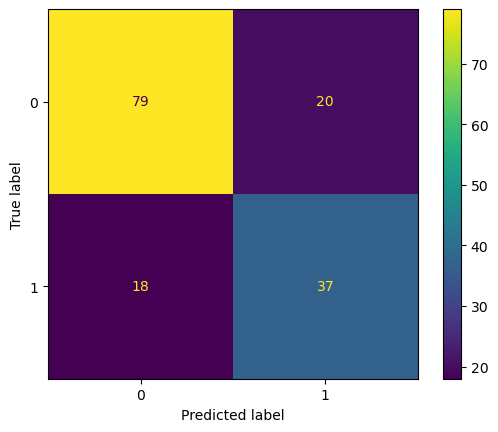

In [4]:
# Your code here
# 1. Calculate accuracy
from sklearn import metrics


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
# 2. Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# 3. Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Interpretation of Model Evaluation Results

**Overall Accuracy: 75%**
- The model correctly predicts diabetes status in 75% of cases
- This is reasonably good but leaves room for improvement

**Confusion Matrix Analysis:**
```
                Predicted No (0)  Predicted Yes (1)
Actual No (0)         79                20
Actual Yes (1)        18                37
```
- **True Negatives (79)**: Correctly predicted no diabetes
- **False Positives (20)**: Predicted diabetes when there was none (Type I error)
- **False Negatives (18)**: Missed diabetes cases (Type II error) - **THIS IS MORE SERIOUS**
- **True Positives (37)**: Correctly identified diabetes

**Classification Report Breakdown:**

*For Class 0 (No Diabetes):*
- **Precision: 0.81** - When the model predicts "no diabetes", it's correct 81% of the time
- **Recall: 0.80** - The model catches 80% of actual non-diabetes cases
- **F1-Score: 0.81** - Harmonic mean of precision and recall

*For Class 1 (Has Diabetes):*
- **Precision: 0.65** - When the model predicts "diabetes", it's correct only 65% of the time
- **Recall: 0.67** - The model catches only 67% of actual diabetes cases (misses 33%!)
- **F1-Score: 0.66** - Lower performance compared to Class 0

**Key Concerns:**
1. The model performs **worse at detecting diabetes** (Class 1) than detecting healthy patients
2. Missing 18 out of 55 diabetes cases (33% false negative rate) could have serious health consequences
3. The model is somewhat biased toward predicting "no diabetes"

## Model Interpretation
1. Print the coefficients of the logistic regression model
2. Visualize the importance of each feature

Coefficients:
Pregnancies: 0.2126
Glucose: 1.0713
BloodPressure: -0.2478
SkinThickness: 0.0457
Insulin: -0.2008
BMI: 0.7782
DiabetesPedigreeFunction: 0.2306
Age: 0.4212

Intercept: -0.8861


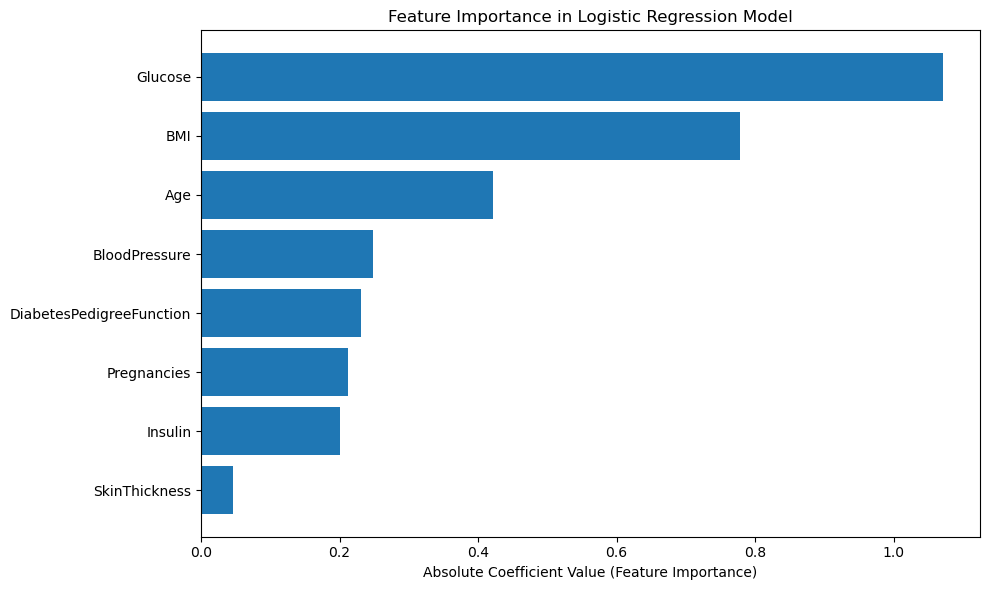


Feature Importance (by absolute coefficient value):
Glucose: 1.0713 (coefficient: 1.0713)
BMI: 0.7782 (coefficient: 0.7782)
Age: 0.4212 (coefficient: 0.4212)
BloodPressure: 0.2478 (coefficient: -0.2478)
DiabetesPedigreeFunction: 0.2306 (coefficient: 0.2306)
Pregnancies: 0.2126 (coefficient: 0.2126)
Insulin: 0.2008 (coefficient: -0.2008)
SkinThickness: 0.0457 (coefficient: 0.0457)


In [5]:
# Your code here
# 1. Print coefficients
coefficients = model.coef_[0]
print("Coefficients:")
for feature, coef in zip(columns, coefficients):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_[0]:.4f}")

# 2. Visualize feature importance
# For logistic regression, we use absolute value of coefficients
feature_importance = np.abs(coefficients)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(columns)[sorted_idx])
plt.xlabel('Absolute Coefficient Value (Feature Importance)')
plt.title('Feature Importance in Logistic Regression Model')
plt.tight_layout()
plt.show()

# Print feature importance ranking
print("\nFeature Importance (by absolute coefficient value):")
for i in sorted_idx[::-1]:  # Reverse to show most important first
    print(f"{columns[i]}: {feature_importance[i]:.4f} (coefficient: {coefficients[i]:.4f})")


## Conclusion
Summarize your findings and interpret the results. Consider the following questions:
1. How well does the model perform in predicting diabetes?
it can predict with an allrigth procentage, but it is missing a lot of diabetes patiences and it would therefore be better to have a higher recall for call 1 
2. Which features seem to be the most important in predicting diabetes?
Glucose and BMI are by far the most important predictors
Age also matters significantly
Some coefficients (like Insulin being negative) might indicate data quality issues or complex interactions
The model has learned medically reasonable patterns overall
3. What are some limitations of this model?

**Key Limitations:**

- **Linear Decision Boundary**: Logistic regression assumes a linear relationship between features and the log-odds of the outcome. Real-world diabetes risk may involve complex, non-linear interactions between features (e.g., the combined effect of high BMI AND high glucose might be more than additive).

- **Poor Recall for Diabetes Cases**: The model misses 33% of actual diabetes cases (18 false negatives). In healthcare, missing a positive diagnosis can have serious consequences.

- **Class Imbalance**: The dataset has fewer diabetes cases than non-diabetes cases (55 vs 99 in test set), which may bias the model toward predicting "no diabetes".

- **Data Quality Issues**: Some features like Insulin show counterintuitive negative coefficients, suggesting possible data quality problems (zero values coded as missing, measurement errors, etc.).

- **Limited Feature Engineering**: We didn't create interaction terms (e.g., BMI × Age) or polynomial features that might capture non-linear relationships.

- **No Feature Selection**: We used all 8 features without testing if some might be redundant or noisy.

- **Single Train-Test Split**: Using only one 80-20 split means results might vary with different random splits. Cross-validation would give more reliable performance estimates.

4. How might you improve the model's performance?

make it non linear to make sure if the data can not be seperated just based on linearity it can with non linearity. Other then that more data and make it take more diabetes prediction, but this will also make the accuracy lower